<a href="https://colab.research.google.com/github/Siarhei-Y/tea_recognition/blob/main/Tea_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import PIL
import PIL.Image
import pathlib

### Upload data

In [65]:
path = r'/content/drive/MyDrive/Data/tea_recognition/img'
labels = pd.read_csv(r'/content/drive/MyDrive/Data/tea_recognition/train.csv')

In [66]:
# labels.head()

In [67]:
data_dir = pathlib.Path(r'/content/drive/MyDrive/Data/tea_recognition/img/') 
data_dir

PosixPath('/content/drive/MyDrive/Data/tea_recognition/img')

In [68]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3208


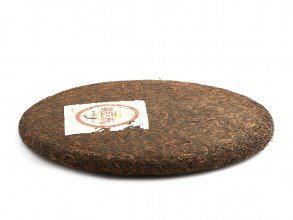

In [72]:
roses = list(data_dir.glob('shu_puerh/*'))
PIL.Image.open(str(roses[0]))

### Create a dataset

In [73]:
BATCH_SIZE = 32
IMG_HEIGHT = 180
IMG_WIDTH = 180

In [74]:
x_train = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=42,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size= BATCH_SIZE)

Found 3208 files belonging to 8 classes.
Using 2567 files for training.


In [75]:
x_val = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=42,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)

Found 3208 files belonging to 8 classes.
Using 641 files for validation.


In [76]:
classes = x_train.class_names
print(classes)

['black_tea', 'green_tea', 'phoenix-oolong', 'sheng_puerh', 'shu_puerh', 'south_fujian', 'taiwanese_oolong', 'wyui_oolong']


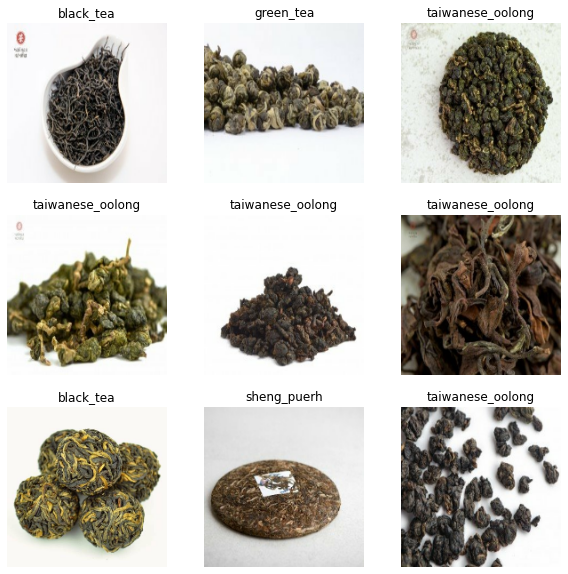

In [77]:
plt.figure(figsize=(10, 10))
for images, labels in x_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(classes[labels[i]])
    plt.axis('off')

In [78]:
for img_batch , labels_batch in x_train:
  print(img_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [80]:
AUTOTUNE = tf.data.AUTOTUNE

x_train = x_train.cache().prefetch(buffer_size=AUTOTUNE)
x_val = x_val.cache().prefetch(buffer_size=AUTOTUNE)

### Train a model


In [86]:
K = len(classes)
EPOCHS = 15 

In [84]:
model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(K, activation='softmax')
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [87]:
r = model.fit(
  x_train,
  validation_data=x_val,
  epochs=EPOCHS
)

Epoch 1/15
81/81 [==============================] - 3s 35ms/step - loss: 1.1787 - accuracy: 0.5567 - val_loss: 1.4096 - val_accuracy: 0.4446
Epoch 2/15
81/81 [==============================] - 3s 35ms/step - loss: 0.9776 - accuracy: 0.6447 - val_loss: 1.5423 - val_accuracy: 0.4259
Epoch 3/15
81/81 [==============================] - 3s 35ms/step - loss: 0.7654 - accuracy: 0.7195 - val_loss: 1.7422 - val_accuracy: 0.3822
Epoch 4/15
81/81 [==============================] - 3s 35ms/step - loss: 0.6373 - accuracy: 0.7807 - val_loss: 2.0692 - val_accuracy: 0.3978
Epoch 5/15
81/81 [==============================] - 3s 35ms/step - loss: 0.5802 - accuracy: 0.7970 - val_loss: 2.0683 - val_accuracy: 0.4540
Epoch 6/15
81/81 [==============================] - 3s 34ms/step - loss: 0.3834 - accuracy: 0.8730 - val_loss: 2.1767 - val_accuracy: 0.4649
Epoch 7/15
81/81 [==============================] - 3s 35ms/step - loss: 0.3171 - accuracy: 0.8933 - val_loss: 2.3462 - val_accuracy: 0.4836
Epoch 8/15
81

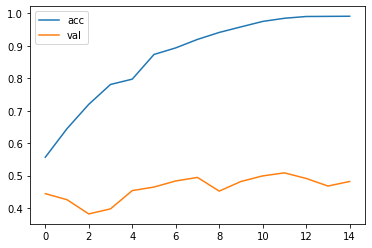

In [89]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val')
plt.legend()

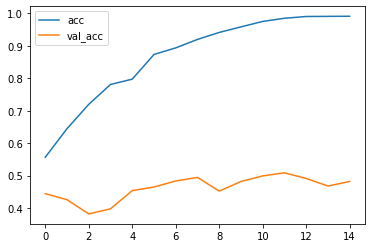

In [90]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()